In [1]:
pip install osmnx geopandas folium numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install numpy==1.22.4
!pip install --upgrade scipy

In [3]:
import osmnx as ox
import geopandas as gpd
import folium
import numpy as np
import pandas as pd
import random
import time

C:\Users\hi\AppData\Local\Temp\ipykernel_14112\900836092.py:5: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_14112\900836092.py:5: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


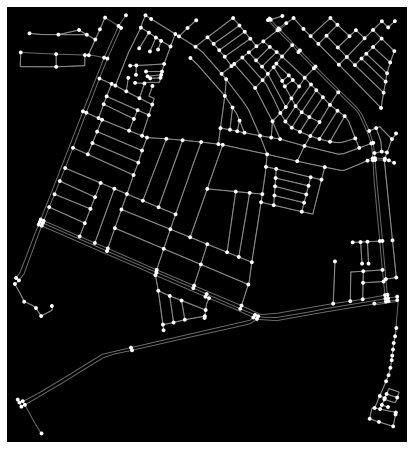

In [4]:
import matplotlib.pyplot as plt

north, south, east, west = 12.935, 12.920, 77.634, 77.620

graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')

fig, ax = ox.plot_graph(graph, bgcolor='k', node_color='w', node_size=15, edge_color='#999999', edge_linewidth=1, edge_alpha=0.7)
plt.show()

In [5]:
edges = ox.graph_to_gdfs(graph, edges=True)

C:\Users\hi\AppData\Local\Temp\ipykernel_14112\846609890.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_14112\846609890.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


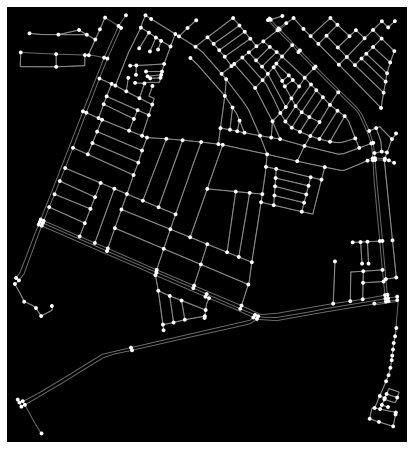

                              length
u         v          key            
254920166 254920223  0    137.544123
          1615723287 0     13.669284
          308918179  0     61.662981
254920223 17327139   0     51.300797
          1625402539 0     12.584506


In [7]:
north, south, east, west = 12.935, 12.920, 77.634, 77.62
graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
utm_crs = 'EPSG:32643'
edges = edges.to_crs(utm_crs)

edges['length'] = edges.geometry.length 

segments = edges[edges['length'] < 1000]

fig, ax = ox.plot_graph(graph, bgcolor='k', node_color='w', node_size=15, edge_color='#999999', edge_linewidth=1, edge_alpha=0.7)
plt.show()

print(segments[['length']].head())

In [8]:
import geopandas as gpd

edges['length'] = edges.geometry.length
segments = edges[edges['length'] < 1000]

In [9]:
import random

def simulate_gps_data(segments, num_samples=10):
    gps_data = []
    for _ in range(num_samples):
        segment = segments.sample(1)
        length = segment['length'].values[0]
        point = segment.geometry.values[0].interpolate(random.uniform(0, 1))
        gps_data.append((point.y, point.x, length))
    return gps_data

simulated_gps = simulate_gps_data(segments, num_samples=20)

In [10]:
def calculate_eta(gps_data, average_speed=30):
    eta_data = []
    for lat, lon, length in gps_data:
        time_seconds = (length / 1000) / (average_speed / 3600)
        eta_data.append((lat, lon, time_seconds))
    return eta_data

eta_predictions = calculate_eta(simulated_gps)

In [11]:
import folium

eta_predictions = [
    (12.9355, 77.6245, 120),
    (12.9340, 77.6230, 90),
    (12.9360, 77.6250, 150)
]

m = folium.Map(location=[12.9352, 77.6243], zoom_start=14)
for lat, lon, eta in eta_predictions:
    folium.Marker(location=[lat, lon], popup=f"ETA: {eta:.2f} seconds").add_to(m)

m

In [12]:
north, south, east, west = 12.935, 12.920, 77.634, 77.620

graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')

nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

utm_crs = 'EPSG:32643'
edges = edges.to_crs(utm_crs)

edges['length'] = edges.geometry.length

segments = edges[edges['length'] < 1000]
def simulate_vehicle_movement(segments, speed_kmh=30):
    speed_mps = speed_kmh / 3.6    
    current_segment = segments.sample(1).iloc[0]
    current_length = current_segment['length']    
    position = 0  
    
    while position < current_length:
        remaining_length = current_length - position
        eta = remaining_length / speed_mps 
        
        position += speed_mps  
        print(f"Current Position: {position:.2f} m, ETA: {eta:.2f} seconds")
        time.sleep(1) 

    print("Reached the end of the segment!")

simulate_vehicle_movement(segments)

C:\Users\hi\AppData\Local\Temp\ipykernel_14112\1470367905.py:3: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_14112\1470367905.py:3: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')


Current Position: 8.33 m, ETA: 3.81 seconds
Current Position: 16.67 m, ETA: 2.81 seconds
Current Position: 25.00 m, ETA: 1.81 seconds
Current Position: 33.33 m, ETA: 0.81 seconds
Reached the end of the segment!


In [15]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1  --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [16]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu116.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu116.html
!pip install torch-geometric
import torch_geometric
print(torch_geometric.__version__)

Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu116.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Running setup.py clean for torch-scatter
Failed to build torch-scatter
    Running setup.py install for torch-scatter: started
    Running setup.py install for torch-scatter: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\anac\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hi\\AppData\\Local\\Temp\\pip-install-l4dr1qa2\\torch-scatter_a323405aeff041178c33c8457db2e417\\setup.py'"'"'; __file__='"'"'C:\\Users\\hi\\AppData\\Local\\Temp\\pip-install-l4dr1qa2\\torch-scatter_a323405aeff041178c33c8457db2e417\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hi\AppData\Local\Temp\pip-wheel-wxyr0hdf'
       cwd: C:\Users\hi\AppData\Local\Temp\pip-install-l4dr1qa2\torch-scatter_a323405aeff041178c33c8457db2e417\
  Complete output (38 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build

Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu116.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Running setup.py clean for torch-sparse
Failed to build torch-sparse
    Running setup.py install for torch-sparse: started
    Running setup.py install for torch-sparse: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\anac\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hi\\AppData\\Local\\Temp\\pip-install-d6c_z6pi\\torch-sparse_ecd1ec7dc54e4cbc918da660be13033c\\setup.py'"'"'; __file__='"'"'C:\\Users\\hi\\AppData\\Local\\Temp\\pip-install-d6c_z6pi\\torch-sparse_ecd1ec7dc54e4cbc918da660be13033c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hi\AppData\Local\Temp\pip-wheel-z8cnyc3e'
       cwd: C:\Users\hi\AppData\Local\Temp\pip-install-d6c_z6pi\torch-sparse_ecd1ec7dc54e4cbc918da660be13033c\
  Complete output (63 lines):
  running bdist_wheel
  C:\anac\lib\site-packages\torch\utils\cpp_extension.py:411: UserWarning: Attempted to use ninja as the B

2.5.3


In [17]:
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

edges['road_type'] = edges['highway']
print(edges[['highway', 'road_type']].head())

                           highway road_type
u         v          key                    
254920166 254920223  0     primary   primary
          1615723287 0    tertiary  tertiary
          308918179  0    tertiary  tertiary
254920223 17327139   0     primary   primary
          1625402539 0    tertiary  tertiary


In [18]:
utm_crs = 'EPSG:32643' 
edges = edges.to_crs(utm_crs)

edges['length'] = edges.geometry.length

segments = edges[edges['length'] < 1000]

In [19]:
print(segments.columns)

supersegments = []
for _, group in segments.groupby('highway'):
    supersegment = {
        'nodes': group.index.tolist(),
        'edges': group.geometry.tolist(),
        'length': group['length'].sum(),
        
    }
    supersegments.append(supersegment)

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'reversed', 'length',
       'geometry', 'width', 'est_width', 'bridge', 'maxspeed', 'access',
       'road_type'],
      dtype='object')


In [20]:
import torch
from torch_geometric.data import Data

nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
utm_crs = 'EPSG:32643'
edges = edges.to_crs(utm_crs)
nodes = nodes.to_crs(utm_crs)

edges['length'] = edges.geometry.length

segments = edges[edges['length'] < 1000]

column_to_group_by = 'road_type' if 'road_type' in segments.columns else 'highway'

supersegments = []
for _, group in segments.groupby(column_to_group_by):
    supersegment = {
        'nodes': group.index.tolist(),  
        'edges': group.geometry.tolist(),
        'length': group['length'].sum(),
    }
    supersegments.append(supersegment)

data_list = []
for supersegment in supersegments:
    edge_index = []
    nodes = supersegment['nodes']
    print(f"Nodes: {nodes}")
    
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            edge_index.append([nodes[i], nodes[j]])
    
    print(f"Edge Index (before tensor conversion): {edge_index}")
    
    if len(edge_index) > 0:
        try:
            edge_index_tensor = torch.tensor(edge_index, dtype=torch.long)
            print(f"Edge Index Tensor Shape: {edge_index_tensor.shape}")
            edge_index_tensor = edge_index_tensor.t().contiguous()
            print(f"Edge Index Tensor Shape after transpose: {edge_index_tensor.shape}")
        except Exception as e:
            print(f"Error converting edge_index to tensor: {e}")
            continue
    else:
        print("No edges found for this supersegment.")
        continue

    x = torch.tensor([[1.0] * 5] * len(supersegment['nodes']), dtype=torch.float)

    y = torch.tensor([supersegment['length']], dtype=torch.float)

    try:
        data = Data(x=x, edge_index=edge_index_tensor, y=y)
        data_list.append(data)
    except Exception as e:
        print(f"Error creating Data object: {e}")

Nodes: [(11017412094, 11017412095, 0), (11017412095, 11017412094, 0), (11017412096, 11017412097, 0), (11017412097, 11017412096, 0), (11017447792, 11017447793, 0), (11017447793, 11017447792, 0)]
Edge Index (before tensor conversion): [[(11017412094, 11017412095, 0), (11017412095, 11017412094, 0)], [(11017412094, 11017412095, 0), (11017412096, 11017412097, 0)], [(11017412094, 11017412095, 0), (11017412097, 11017412096, 0)], [(11017412094, 11017412095, 0), (11017447792, 11017447793, 0)], [(11017412094, 11017412095, 0), (11017447793, 11017447792, 0)], [(11017412095, 11017412094, 0), (11017412096, 11017412097, 0)], [(11017412095, 11017412094, 0), (11017412097, 11017412096, 0)], [(11017412095, 11017412094, 0), (11017447792, 11017447793, 0)], [(11017412095, 11017412094, 0), (11017447793, 11017447792, 0)], [(11017412096, 11017412097, 0), (11017412097, 11017412096, 0)], [(11017412096, 11017412097, 0), (11017447792, 11017447793, 0)], [(11017412096, 11017412097, 0), (11017447793, 11017447792, 0)]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class ETA_GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, batch)
        x = self.lin(x)
        return x

In [22]:
print(f"Number of supersegments created: {len(supersegments)}")

Number of supersegments created: 7


In [23]:
for i, segment in enumerate(supersegments):
    print(f"Supersegment {i}: {segment}")
    if i >= 5:
        break

Supersegment 0: {'nodes': [(11017412094, 11017412095, 0), (11017412095, 11017412094, 0), (11017412096, 11017412097, 0), (11017412097, 11017412096, 0), (11017447792, 11017447793, 0), (11017447793, 11017447792, 0)], 'edges': [<LINESTRING (784861.841 1431158.773, 784820.767 1431156.215)>, <LINESTRING (784820.767 1431156.215, 784861.841 1431158.773)>, <LINESTRING (784864.53 1431170.768, 784810.328 1431164.079)>, <LINESTRING (784810.328 1431164.079, 784864.53 1431170.768)>, <LINESTRING (784765.263 1431206.569, 784764.317 1431169.662)>, <LINESTRING (784764.317 1431169.662, 784765.263 1431206.569)>], 'length': 265.3703252420675}
Supersegment 1: {'nodes': [(254920166, 254920223, 0), (254920223, 17327139, 0), (260729372, 6180265403, 0), (260911861, 11809900885, 0), (260911861, 6137525101, 0), (304771894, 305091341, 0), (305091341, 503050641, 0), (305091600, 503065534, 0), (308915753, 11809900886, 0), (308915754, 260911861, 0), (308915754, 6022021528, 0), (308917112, 6462712325, 0), (308918175, 

In [ ]:
bbox = (77.620, 12.925, 77.630, 12.935)
graph = ox.graph_from_bbox(*bbox, network_type='drive')

C:\Users\hi\AppData\Local\Temp\ipykernel_14112\723051134.py:3: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(*bbox, network_type='drive')
C:\Users\hi\AppData\Local\Temp\ipykernel_14112\723051134.py:3: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(*bbox, network_type='drive')
C:\anac\lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 12,652 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
import osmnx as ox
import torch
from torch_geometric.data import Data, DataLoader
import torch.optim as optim

north, south, east, west = 12.935, 12.920, 77.634, 77.620
graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
edges['road_type'] = edges['highway']

supersegments = []
for _, group in edges.groupby('road_type'):  
    supersegment = {
        'nodes': group.index.tolist(),  
        'edges': group.geometry.tolist(),  
        'length': group['length'].sum(),
    }
    supersegments.append(supersegment)

data_list = []
for supersegment in supersegments:
    edge_index = [] 
    num_nodes = len(supersegment['nodes'])
    
    if num_nodes > 1:
        for i in range(num_nodes):
            for j in range(i + 1, num_nodes):
                edge_index.append([supersegment['nodes'][i], supersegment['nodes'][j]])
    
        edge_index = torch.tensor(edge_index, dtype=torch.long)
        
        print(f"Edge index before transpose shape: {edge_index.shape}")

        edge_index = edge_index.t().contiguous() 

        print(f"Edge index after transpose shape: {edge_index.shape}")
        x = torch.tensor([[1.0] * 5] * num_nodes, dtype=torch.float) 
        y = torch.tensor([supersegment['length']], dtype=torch.float)
        data = Data(x=x, edge_index=edge_index, y=y)
        data_list.append(data)
    else:
        print(f"Skipping supersegment with {num_nodes} nodes.")

if not data_list:
    raise ValueError("data_list is empty. Ensure that your dataset is correctly created.")

train_loader = DataLoader(data_list, batch_size=32, shuffle=True)

model = ETA_GNN(in_channels=5, hidden_channels=32, out_channels=1)
criterion = torch.nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 10 

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad() 
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')

In [ ]:
model.eval()
with torch.no_grad():
    for data in test_loader:
        test_out = model(data.x, data.edge_index, data.batch)
        test_loss = criterion(test_out, data.y)
        print(f'Test Loss: {test_loss.item():.4f}')